<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [43]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



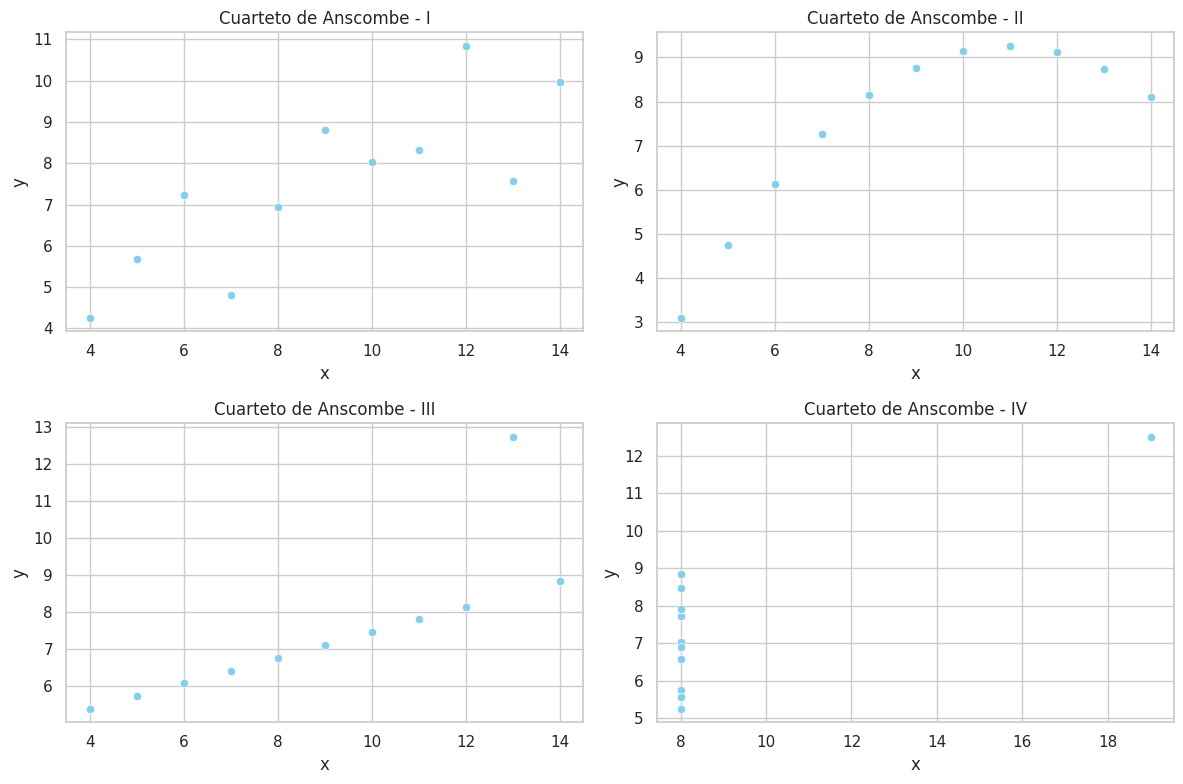

In [44]:
# Reutilizamos código de la Tarea 1
# Creamos un arreglo de 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2)
# Pasamos el arreglo de ejes a 1 dimensión (en lugar de un arreglo de arreglos)
axes = axes.flatten()

for i, dataset in enumerate(data["dataset"].unique()):
    sns.scatterplot(
    data = data[data["dataset"] == dataset],
    x='x',
    y='y',
    color = 'skyblue',
    ax=axes[i] # Colocamos el grafico en el i-esimo eje
    )
    axes[i].set_title(f'Cuarteto de Anscombe - {dataset}') # Colocamos titulo a cada grafico
    axes[i].set_xlabel('x') # Colocamos la etiqueta al eje x
    axes[i].set_ylabel('y') # Colocamos la etiqueta al eje y

# Mostramos los graficos
plt.tight_layout()
plt.show()

Sí, hay diferencias significativas entre los grupos:
*   El grupo I tiene un comportamiento aproximadamente lineal, sin outliers,
*   El grupo II sigue una distribución aparentemente cuadrática.
*   El grupo III tiene una distribución muy lineal, pero con un outlier claro.
*   El grupo IV se agrupa en una línea vertical, pero con un outlier claro.



2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [45]:
describe_data = data.groupby('dataset').describe()
describe_data

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

El promedio y la desviación estándar son iguales para los valores de `x` en todos los datasets, mientras que el promedio y la desviación estándar de los valores de `y` son muy similares (mas no iguales).

Las estadísticas más significativas que permiten diferenciar a cada grupo son las medidas de dispersión y, en particular, los valores mínimo y máximo y la mediana de `x` e `y`. Por ejemplo, en el grupo IV, podemos ver que hasta el 75% de los datos corresponde al valor `x`=8, lo cual da cuenta del outlier visto en el inciso anterior. Algo parecido ocurre con los valores de `y` en el grupo III.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



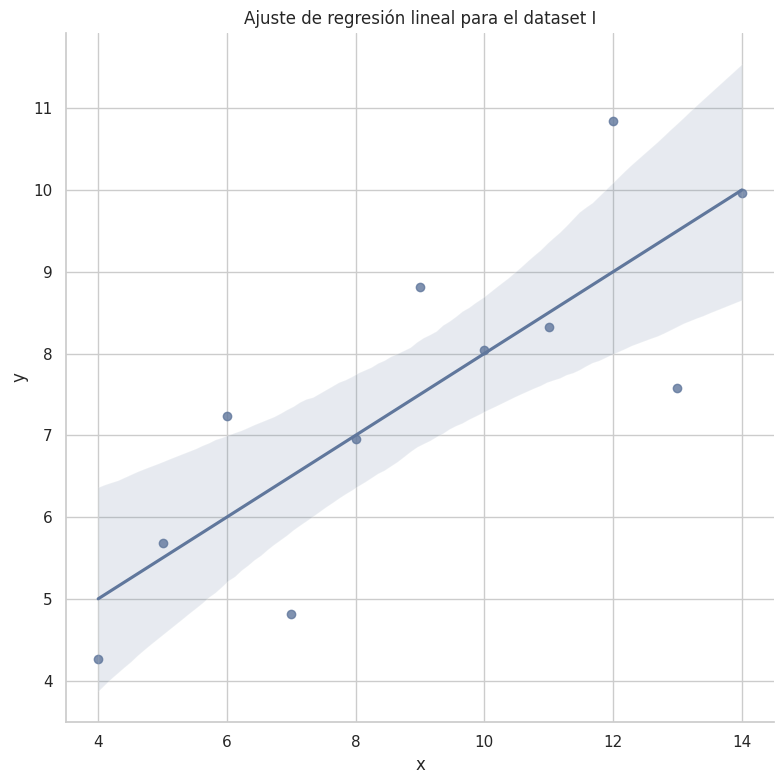

Error absoluto medio (MAE): 0.59
Error cuadrático medio (MSE): 0.99
Coeficiente de determinación (R^2): 0.76


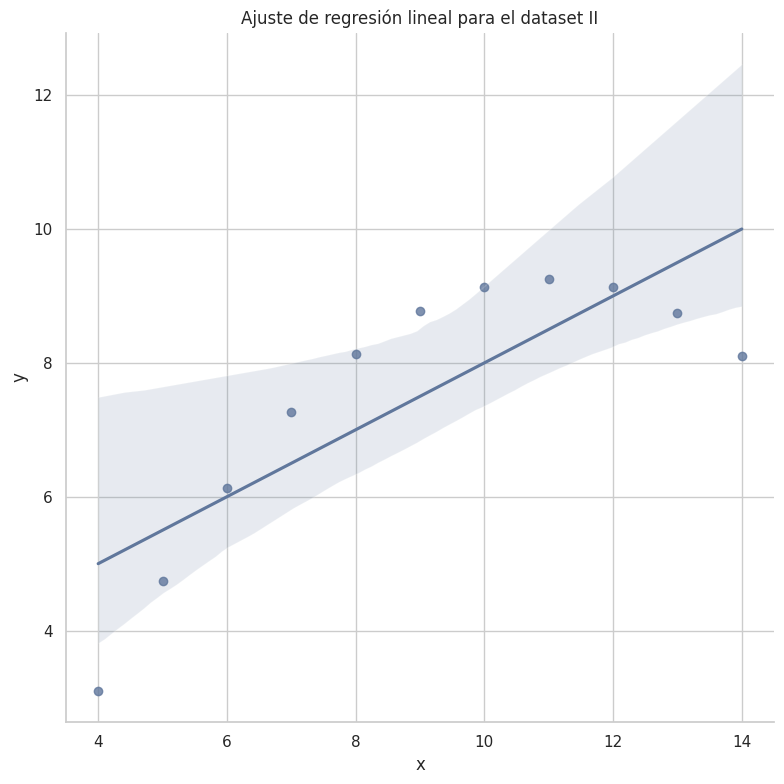

Error absoluto medio (MAE): 1.19
Error cuadrático medio (MSE): 2.07
Coeficiente de determinación (R^2): 0.22


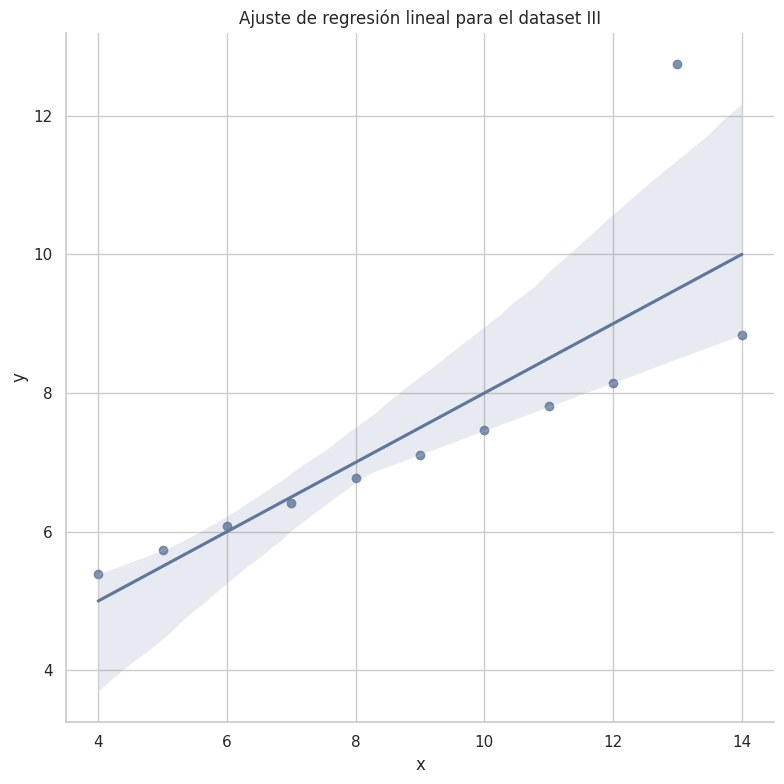

Error absoluto medio (MAE): 0.83
Error cuadrático medio (MSE): 1.18
Coeficiente de determinación (R^2): 0.14


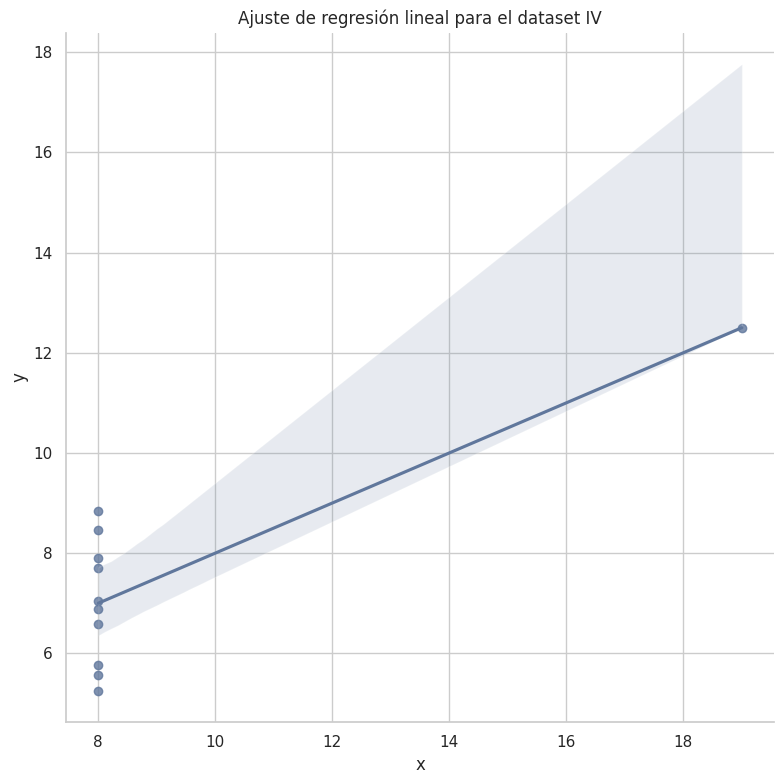

Error absoluto medio (MAE): 0.37
Error cuadrático medio (MSE): 0.27
Coeficiente de determinación (R^2): -0.12


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Iteramos por cada uno de los cuatro grupos
for dataset in data["dataset"].unique():
    # Seleccionamos un grupo
    d = data[data["dataset"] == dataset]
    # Doble [] para que model.fit no falle
    x = d[['x']]
    y = d['y']

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    # Elegimos test_size=0.3 porque hay pocos datos (menos de 100)

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realizar predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular metricas de evaluacion
    mae = round(mean_absolute_error(y_test, y_pred),2)
    mse = round(mean_squared_error(y_test, y_pred),2)
    r2 = round(r2_score(y_test, y_pred),2)

    # Plot the results
    sns.lmplot(
      x='x',
      y='y',
      data=d,
      height = 8,
    )
    plt.title(f'Ajuste de regresión lineal para el dataset {dataset}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

    # Mostramos las métricas
    print(f"Error absoluto medio (MAE): {mae}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")

Interpretación para cada grupo:
*   El grupo I posee el valor de R^2=0.76, el más alto de los cuatro datasets. Esto indica que el comportamiento de este grupo puede explicarse bien mediante un modelo lineal.
*   El grupo II tiene un R^2=0.22 y el MSE más alto de los cuatro datasets. Esto quiere decir que la calidad del ajuste es baja, esto es, el modelo lineal deja mucho sin explicar sobre el comportamiento del grupo, por lo que no es el adecuado.
*   El grupo III tiene un R^2=0.14, a pesar el comportamiento a plena vista lineal. Puede deberse al alto MSE que genera el outlier de este grupo.
*   El grupo IV tiene, paradójicamente, un R^2=-0.12, un valor negativo. A pesar de que los errores medios no son los más altos, el valor de R^2 implica que la calidad del ajuste es muy mala.





4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


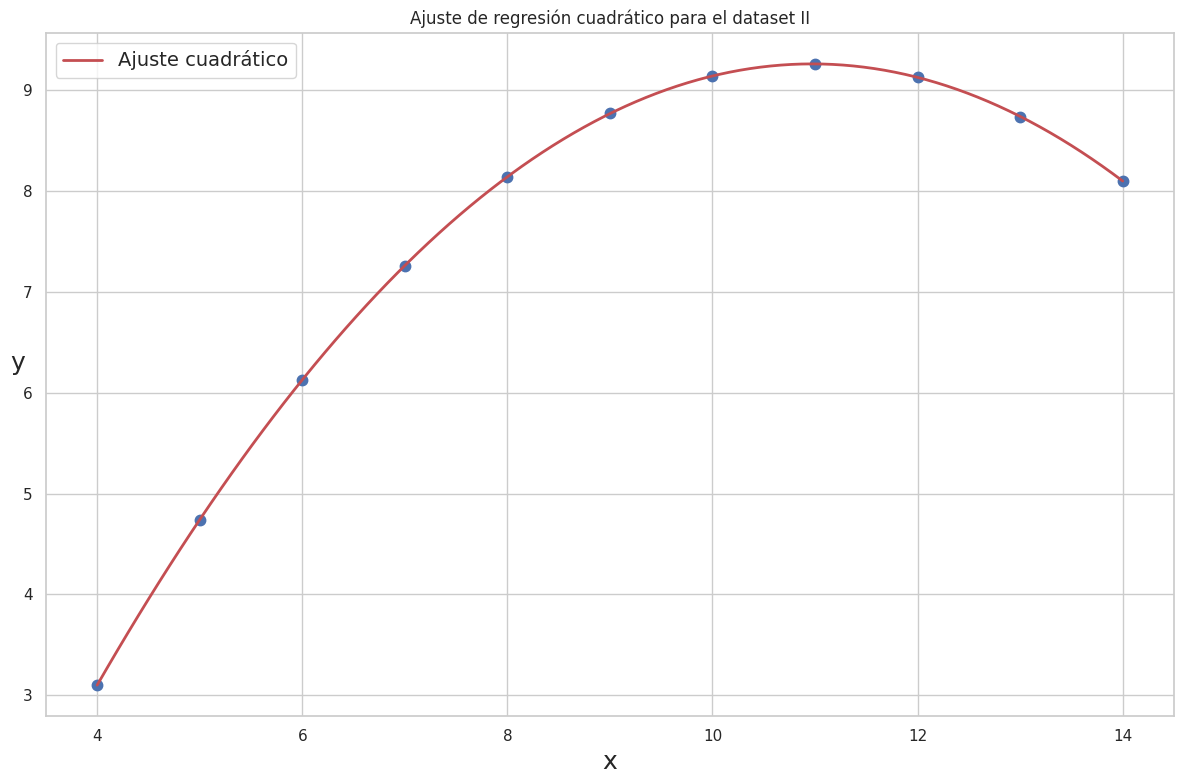

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


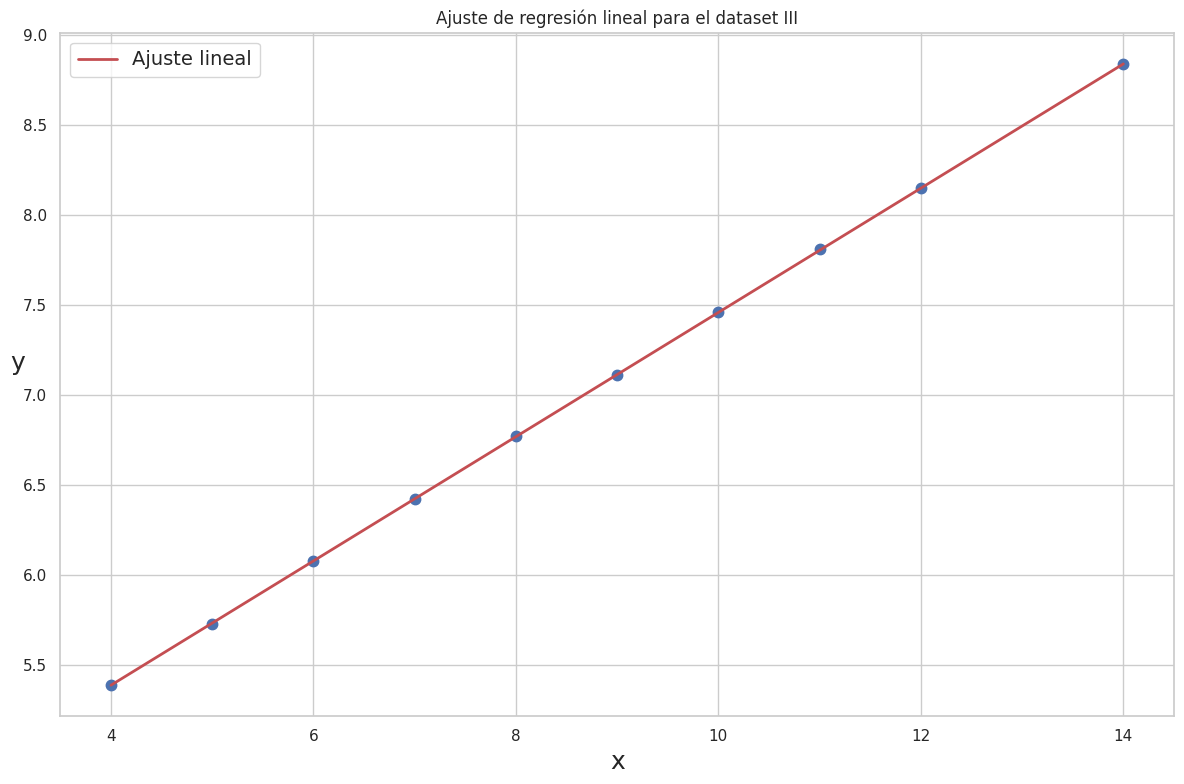

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


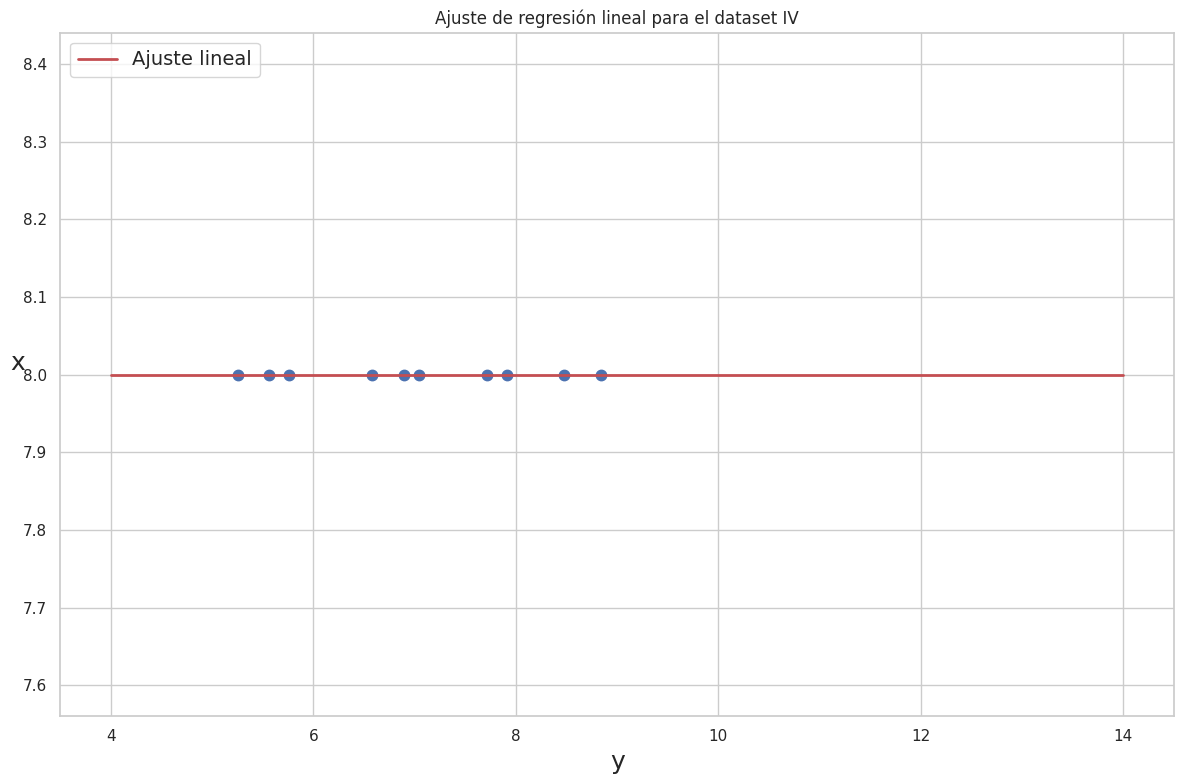

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Para el dataset II, haremos un ajuste cuadrático
d2 = data[data["dataset"]=="II"]
x = d2[["x"]]
y = d2["y"]
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Elegimos test_size=0.3 porque hay pocos datos (menos de 100)
# Hacemos preprocesamiento
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train_poly, y_train)
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_poly)
# Graficamos el ajuste
# Puntos para graficar la curva de regresion cuadratica
X_graf = np.linspace(4, 14, 100).reshape(100, 1)
X_graf_poly = poly.transform(X_graf)
y_graf = model.predict(X_graf_poly)
# Graficos
plt.plot(x, y, "b.", markersize=15)
plt.plot(X_graf, y_graf, "r-", linewidth=2, label="Ajuste cuadrático")
plt.title(f'Ajuste de regresión cuadrático para el dataset II')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.show()


# Para el dataset III, eliminaremos el outlier
d3 = data[(data["dataset"]=="III") & (data["y"]<=12)]
x = d3[["x"]]
y = d3["y"]
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Elegimos test_size=0.3 porque hay pocos datos (menos de 100)
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
# Graficamos el ajuste
# Puntos para graficar la curva de regresion lineal sin outlier
X_graf = np.linspace(4, 14, 100).reshape(100, 1)
y_graf = model.predict(X_graf)
# Graficos
plt.plot(x, y, "b.", markersize=15)
plt.plot(X_graf, y_graf, "r-", linewidth=2, label="Ajuste lineal")
plt.title(f'Ajuste de regresión lineal para el dataset III')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.show()


# Para el dataset IV, invertimos los ejes y eliminamos el outlier
d4 = data[(data["dataset"]=="IV") & (data["x"]<=14)]
x = d4["x"]
y = d4[["y"]]
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Elegimos test_size=0.3 porque hay pocos datos (menos de 100)
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo con el conjunto de entrenamiento
model.fit(y_train, X_train)
# Realizar predicciones sobre el conjunto de prueba
x_pred = model.predict(y_test)
# Graficamos el ajuste
# Puntos para graficar la curva de regresion lineal sin outlier
y_graf = np.linspace(4, 14, 100).reshape(100, 1)
x_graf = model.predict(y_graf)
# Graficos
plt.plot(y, x, "b.", markersize=15)
plt.plot(y_graf, x_graf, "r-", linewidth=2, label="Ajuste lineal")
plt.title(f'Ajuste de regresión lineal para el dataset IV')
plt.xlabel("y", fontsize=18)
plt.ylabel("x", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.tight_layout()
plt.show()